In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('C:/Users/USER/Desktop/Deep_Learning/abalone.csv')
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
# drop('Rings')

# x=df.drop('Rings', axis=1)
# x.head()

In [8]:
# print(x)

        id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  


In [5]:
# y=df['Rings']
# y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [9]:
# print(y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64


In [16]:
# if) 첫 번째 'id'와 index 'Rings'이 필요하지 않을 경우
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [17]:
print(x)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [18]:
print(y)

[15  7  9 ...  9 10 12]


In [19]:
# 'Sex' -> Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 ... 0.2245 0.101 0.15]
 [0.0 0.0 1.0 ... 0.0995 0.0485 0.07]
 [1.0 0.0 0.0 ... 0.2565 0.1415 0.21]
 ...
 [0.0 0.0 1.0 ... 0.5255 0.2875 0.308]
 [1.0 0.0 0.0 ... 0.531 0.261 0.296]
 [0.0 0.0 1.0 ... 0.9455 0.3765 0.495]]


In [20]:
print(x.shape)

(4177, 10)


In [21]:
# 훈련, 테스트 세트 분할
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=12)

# ML ↓

# Linear Regression

In [22]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [23]:
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 4.593124517413417


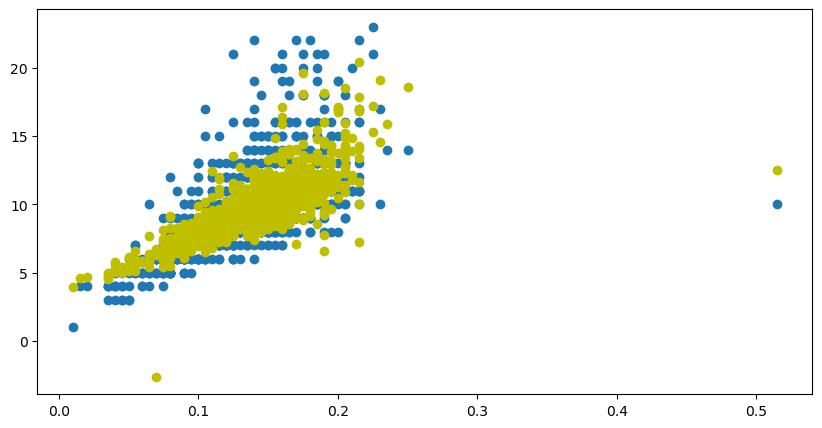

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# Decision Tree Regression

In [25]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [26]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 8.299043062200957


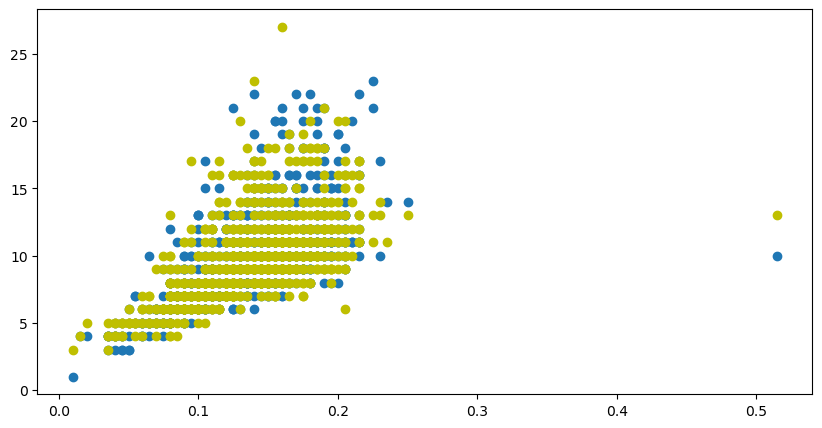

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# Random Forest Regression

In [28]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [29]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 4.525413038277515


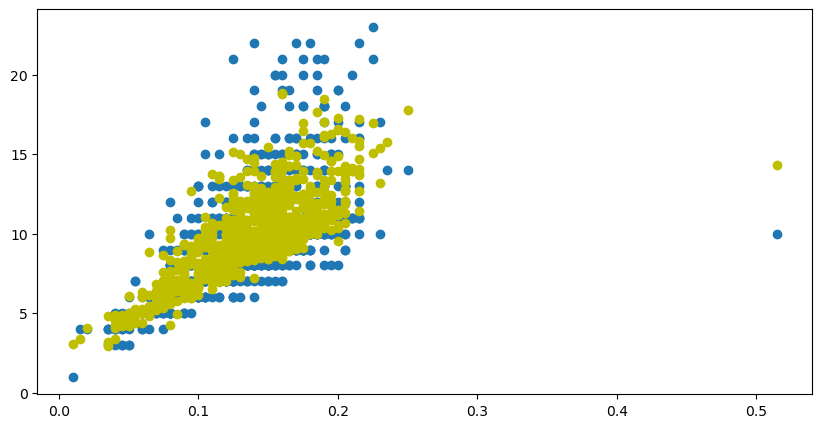

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# SVC(Support Vector Machine Regression)


In [31]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [32]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 5.109164360318865


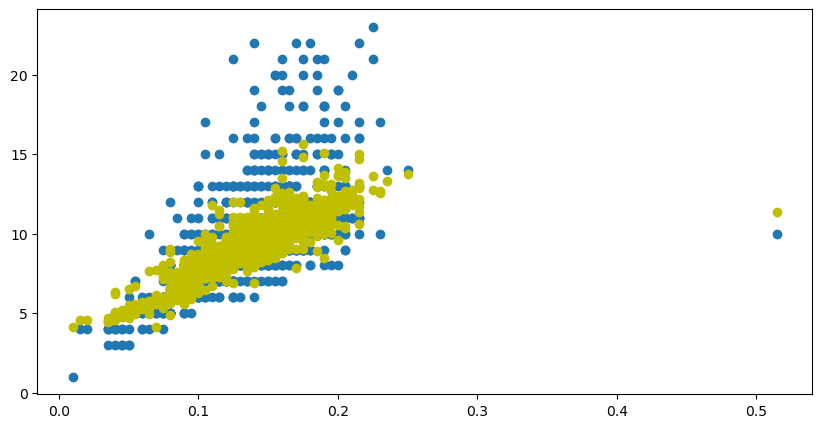

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# KNN Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [35]:
print('평균제곱근오차', mse(y_pred, y_test))

평균제곱근오차 4.749234449760759


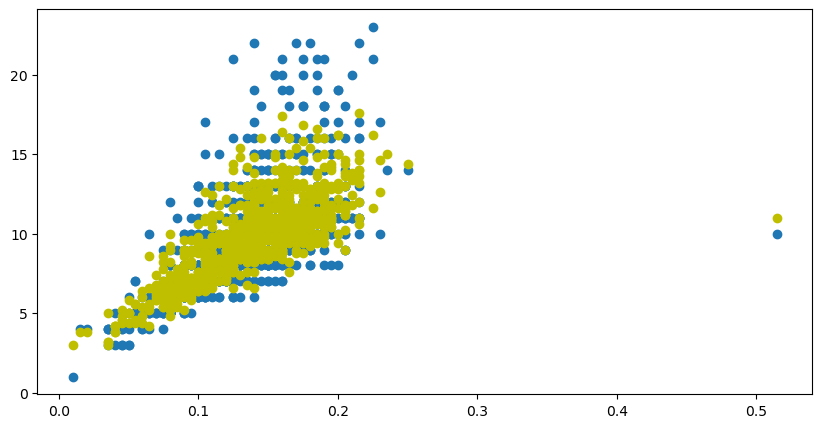

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# Deep Learning

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(12,activation="tanh"),
    layers.Dense(12,activation="tanh"),
    layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [39]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [40]:
history=model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 95.8889 - mse: 95.8889 - val_loss: 54.5374 - val_mse: 54.5374
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44.6924 - mse: 44.6924 - val_loss: 27.3726 - val_mse: 27.3726
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.6274 - mse: 24.6274 - val_loss: 17.7153 - val_mse: 17.7153
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.4078 - mse: 14.4078 - val_loss: 13.4689 - val_mse: 13.4689
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9536 - mse: 12.9536 - val_loss: 11.5156 - val_mse: 11.5156
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.0294 - mse: 11.0294 - val_loss: 10.5229 - val_mse: 10.5229
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2384 - mse: 10.2384 - val_loss: 9.6487 - val_mse: 9.6487
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2837 - mse: 8.2837 - val_loss: 8.3475 - val_mse: 8.3475
Epoch 9/30
105/105 ━━━━━━━━━━━

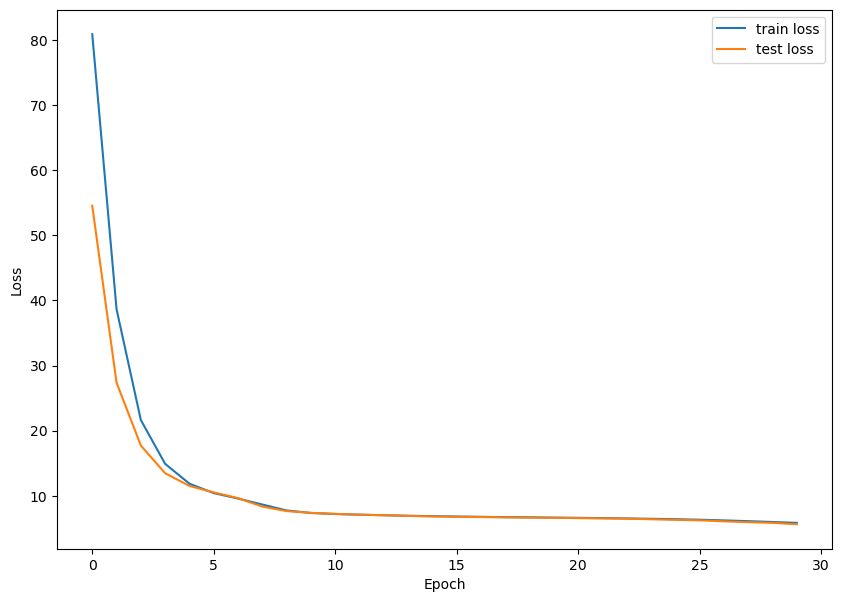

In [41]:
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
model.evaluate(x_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6449 - mse: 5.6449  


[5.637273788452148, 5.637273788452148]